# Kenn Experiments - Plots and Statistics
Run this notebook only after all the tests have been run. 

In [1]:
from model import *
from pre_elab import *
from evaluation_functions import *
import settings as s
import pickle

# Loading results

In [2]:
history_inductive = []
history_transductive = []

for i in range(1,7):
    with open('results/e2e/results_inductive_100runs_{}layers'.format(i),'rb') as input:
        history_inductive.append(pickle.load(input))
    
    with open('results/e2e/results_transductive_100runs_{}layers'.format(i),'rb') as input:
        history_transductive.append(pickle.load(input))

2022-05-26 13:38:20.949121: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Print stats

In [14]:
def print_stats(history_all):
    n_layers_tried = len(history_all)
    for n_layers, history in zip(range(1, n_layers_tried + 1), history_all):
        print("============ KE layers: {} ============".format(n_layers))
        
        means, stds, means_kenn, stds_kenn, means_deltas, stds_deltas = get_means_and_stds(history)
        p_vals = make_t_test(history)
        for i, key in enumerate(history.keys()):
            print("== {}% ==".format(key))
            print("Mean Test Accuracy:\tNN = {:8.6f}; KENN = {:8.6f}".format(
                means[i], means_kenn[i]))
            print("Test Accuracy std:\tNN = {:8.6f}; KENN = {:8.6f}".format(
                stds[i], stds_kenn[i]))
            print("\t\t\tDeltas Mean = {:8.6f}".format(means_deltas[i]))
            print("\t\t\tDeltas Std = {:8.6f}".format(stds_deltas[i]))
            print("\t\t\tright tailed p-value: {}".format(p_vals[i]))
            print()

In [15]:
print_stats(history_inductive)

============ KE layers: 1 ============
== 10% ==
Mean Test Accuracy:	NN = 0.543616; KENN = 0.567092
Test Accuracy std:	NN = 0.052331; KENN = 0.035885
			Deltas Mean = 0.023475
			Deltas Std = 0.057923
			right tailed p-value: 0.00015446730415015855

== 25% ==
Mean Test Accuracy:	NN = 0.626868; KENN = 0.642597
Test Accuracy std:	NN = 0.019889; KENN = 0.016130
			Deltas Mean = 0.015729
			Deltas Std = 0.024209
			right tailed p-value: 2.741969146034752e-09

== 50% ==
Mean Test Accuracy:	NN = 0.678629; KENN = 0.692259
Test Accuracy std:	NN = 0.016831; KENN = 0.022136
			Deltas Mean = 0.013629
			Deltas Std = 0.024339
			right tailed p-value: 1.1588841154782072e-06

== 75% ==
Mean Test Accuracy:	NN = 0.734360; KENN = 0.743696
Test Accuracy std:	NN = 0.027048; KENN = 0.020927
			Deltas Mean = 0.009336
			Deltas Std = 0.027313
			right tailed p-value: 0.0036125552622228497

== 90% ==
Mean Test Accuracy:	NN = 0.765468; KENN = 0.761057
Test Accuracy std:	NN = 0.027466; KENN = 0.028241
			Delta

In [16]:
print_stats(history_transductive)

============ KE layers: 1 ============
== 10% ==
Mean Test Accuracy:	NN = 0.543606; KENN = 0.612402
Test Accuracy std:	NN = 0.052325; KENN = 0.028250
			Deltas Mean = 0.068796
			Deltas Std = 0.058021
			right tailed p-value: 9.409968484602131e-23

== 25% ==
Mean Test Accuracy:	NN = 0.626868; KENN = 0.674376
Test Accuracy std:	NN = 0.019883; KENN = 0.015931
			Deltas Mean = 0.047508
			Deltas Std = 0.024042
			right tailed p-value: 9.6920968900523e-45

== 50% ==
Mean Test Accuracy:	NN = 0.678611; KENN = 0.717832
Test Accuracy std:	NN = 0.016844; KENN = 0.018267
			Deltas Mean = 0.039221
			Deltas Std = 0.021592
			right tailed p-value: 7.320640873928872e-37

== 75% ==
Mean Test Accuracy:	NN = 0.734384; KENN = 0.766123
Test Accuracy std:	NN = 0.027058; KENN = 0.019757
			Deltas Mean = 0.031739
			Deltas Std = 0.027996
			right tailed p-value: 1.0187744507223717e-17

== 90% ==
Mean Test Accuracy:	NN = 0.765499; KENN = 0.786918
Test Accuracy std:	NN = 0.027457; KENN = 0.026029
			Deltas M

# Plot deltas
Improvements in terms of accuracy obtained by the different methods (KENN with 3 KEs layers, SBR, and RNM)

In [17]:
def plot_deltas(history, ax, barwidth=0.3, title='', other_deltas='', confidence_level=0.95):
    assert(other_deltas == '' or other_deltas == 'i' or other_deltas == 't')
    _, _, _, _, means_deltas, _ = get_means_and_stds(history)


    results_NN_Marra_i = np.array([0.645, 0.674, 0.707, 0.717, 0.723])
    results_SBR_i = np.array([0.650, 0.682, 0.712, 0.719, 0.726])
    results_RNM_i = np.array([0.685, 0.709, 0.726, 0.726, 0.732])

    results_NN_Marra_t = np.array([0.640, 0.667, 0.695, 0.708, 0.726])
    results_SBR_t = np.array([0.703, 0.729, 0.747, 0.764, 0.780])
    results_RNM_t = np.array([0.708, 0.735, 0.753, 0.766, 0.780])

    deltas_SBR_i = results_SBR_i - results_NN_Marra_i
    deltas_RNM_i = results_RNM_i - results_NN_Marra_i

    deltas_SBR_t = results_SBR_t - results_NN_Marra_t
    deltas_RNM_t = results_RNM_t - results_NN_Marra_t

    r = np.arange(5) * 3.5 * barwidth
    ax.bar(r, means_deltas, width=barwidth, edgecolor='white', label='KENN')

    if other_deltas == 'i':
        r2 = [x + barwidth for x in r]
        r3 = [x + barwidth for x in r2]
        ax.bar(r2, deltas_SBR_i, width=barwidth,
                edgecolor='white', label='SBR')
        ax.bar(r3, deltas_RNM_i, width=barwidth,
                edgecolor='white', label='RNM')

    elif other_deltas == 't':
        r2 = [x + barwidth for x in r]
        r3 = [x + barwidth for x in r2]
        ax.bar(r2, deltas_SBR_t, width=barwidth, edgecolor='white', label='SBR')
        ax.bar(r3, deltas_RNM_t, width=barwidth, edgecolor='white', label='RNM')

    ax.set_xlabel('Percentage of Training', fontweight='bold')
    ax.set_xticks(r2,
               list(history.keys()))

    ax.set_title(title)


/var/folders/hd/1hc7c3nj721496jtmlf141qw0000gn/T/ipykernel_3305/1720230996.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


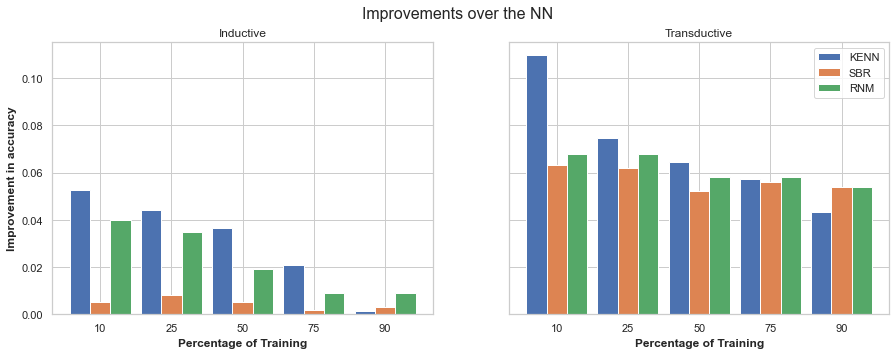

In [18]:
fig, axes = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15, 5))
fig.suptitle('Improvements over the NN', fontsize=16)
plot_deltas(history_inductive[2], axes[0], title='Inductive', other_deltas='i', barwidth=0.6)
axes[0].set_ylabel('Improvement in accuracy', fontweight='bold')
plot_deltas(history_transductive[2], axes[1], title='Transductive', other_deltas='t', barwidth=0.6)
axes[1].legend(loc='upper right')

fig.savefig('plots/deltas.png')
fig.show()

# Plot accuracies with different number of KEs

In [19]:
color_NN = 'grey'
colors_map = ['darkblue', 'darkorange', 'darkgreen', 'darkred', 'lightblue', 'grey', 'brown']
color_SBR = ['pink']
color_RNM = ['purple']

/var/folders/hd/1hc7c3nj721496jtmlf141qw0000gn/T/ipykernel_3305/47712037.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


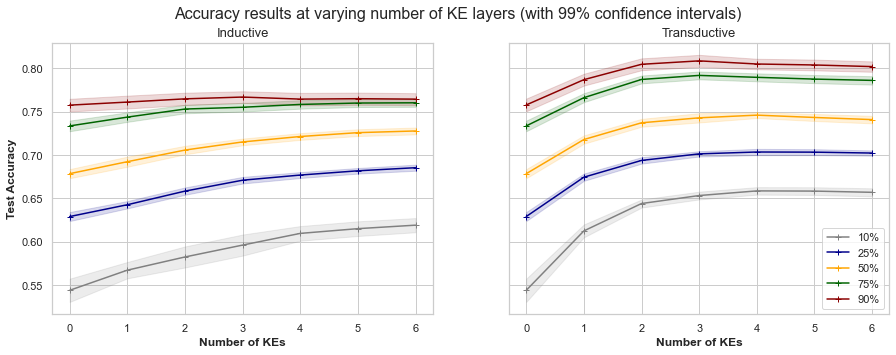

In [20]:
def plot_accuracies_n_layers(history_all, ax, title, confidence_level=0.99):
    n_layers_tried = len(history_all)
    
    means_kenn_list = []
    stds_kenn_list = []
    confidence_margins_kenn_list = []
    for history in history_all:
        confidence_margins_nn, confidence_margins_kenn, _ = get_all_confidence_margins(history, confidence_level)
        means, stds, means_kenn, stds_kenn, _, _ = get_means_and_stds(history)

        confidence_margins_kenn_list.append(confidence_margins_kenn)
        means_kenn_list.append(means_kenn)
        stds_kenn_list.append(stds_kenn)

    
    means_matrix = np.stack([means] + [np.array(mean) for mean in means_kenn_list], 0).T
    confidence_margins_matrix = np.stack([confidence_margins_nn] + [np.array(cm) for cm in confidence_margins_kenn_list], 0).T

    r = np.array([0,1,2,3,4,5,6])

    training_percentage = ['10%', '25%', '50%', '75%', '90%']
    colors = ['grey', 'darkblue', 'orange', 'darkgreen', 'darkred']
    for tp, means, confidence_margins, c in zip(training_percentage, means_matrix, confidence_margins_matrix, colors):
        ax.plot(r, means, '-+', label=tp, color=c)
        ax.fill_between(r, [m - cm for m, cm in zip(means, confidence_margins)],
                           [m + cm for m, cm in zip(means, confidence_margins)], color=c, alpha=.15)

    # Add xticks on the middle of the group bars
    ax.set_xlabel('Number of KEs', fontweight='bold')
    ax.set_title(title, fontsize=13)

    


fig, axes = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15, 5))
fig.suptitle('Accuracy results at varying number of KE layers (with 99% confidence intervals)', fontsize=16)
plot_accuracies_n_layers(history_inductive, axes[0], 'Inductive')
axes[0].set_ylabel('Test Accuracy', fontweight='bold')
plot_accuracies_n_layers(history_transductive, axes[1], 'Transductive')
axes[1].legend(loc='best')


fig.savefig('plots/n_layers_plot.png')
fig.show()

In [21]:
# Histograms

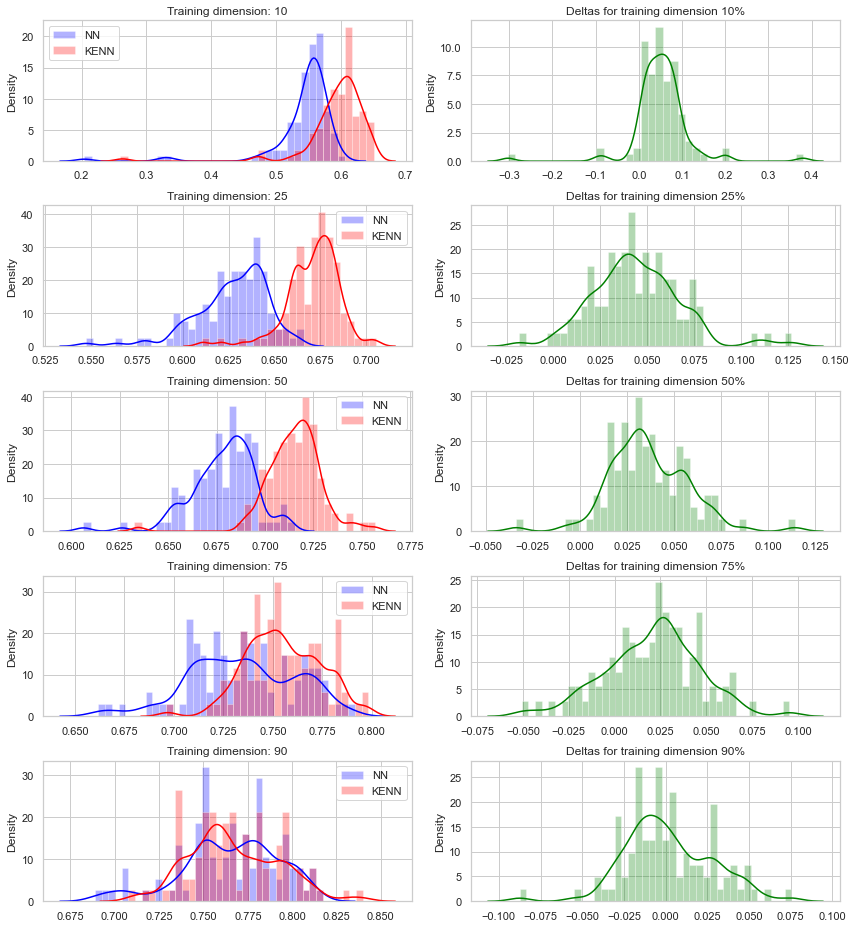

In [22]:
plot_histograms(history_inductive[2], 'histograms_inductive', bw=0.6, bins=40)


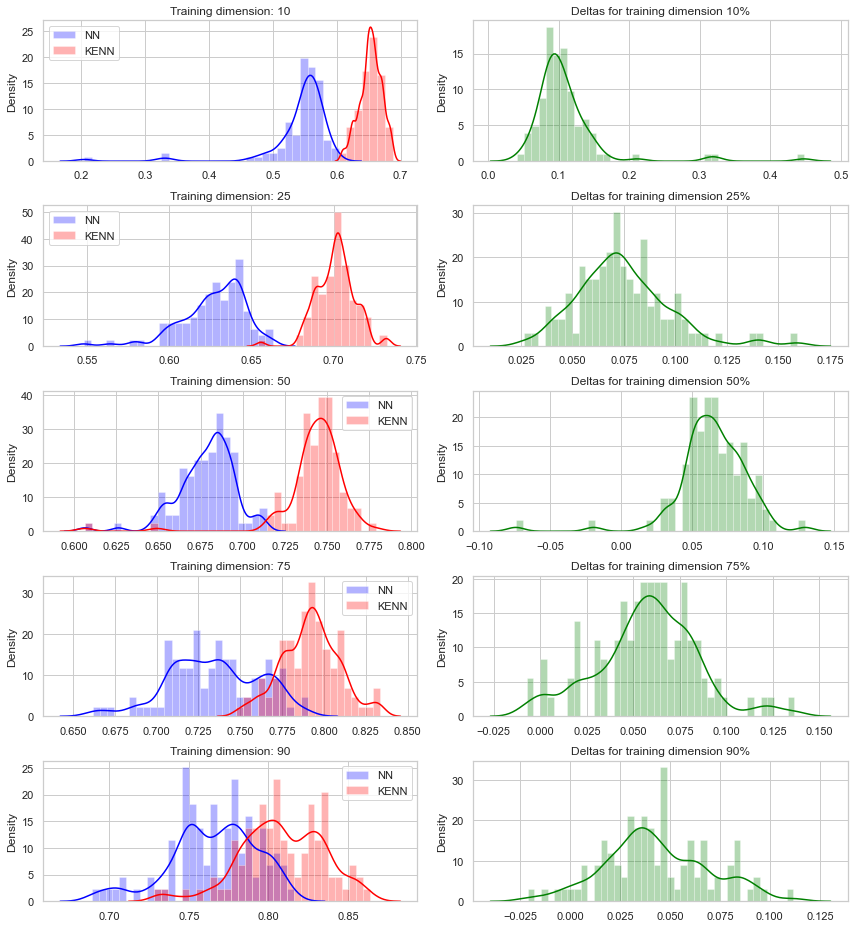

In [23]:
plot_histograms(history_transductive[2], 'histograms_transductive', bw=0.6, bins=40)

# Plot execution time

2.3267802810668945
1:0.0 -> 4.216062583923341
2:0.1 -> 5.582070713043213
3:0.2 -> 6.783201217651367
2.459670066833496
1:0.0 -> 3.139552040100098
2:0.1 -> 4.373304948806764
3:0.2 -> 5.502085132598877


/var/folders/hd/1hc7c3nj721496jtmlf141qw0000gn/T/ipykernel_3305/2762642517.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


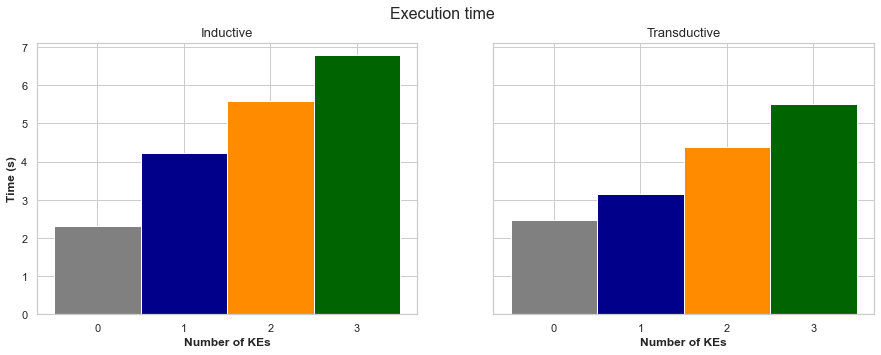

In [26]:
def plot_time(history_all, ax, x_label, title, others, barwidth=0.1, confidence_level=0.95):
    
    time = []
    for p in ['10', '25', '50', '75', '90']:
        time.append(np.mean([a['time'] for a in history_all[0][p]['NN']]))

    ax.bar(0 * barwidth, np.mean(time), label='KENN l={}'.format(0), width=barwidth, color=color_NN, edgecolor='white')
    print(np.mean(time))
    
    for i in range(3):
        time = []
        for p in ['10', '25', '50', '75', '90']:
            time.append(np.mean([a['time'] for a in history_all[i][p]['KENN']]))

        print('{}:{} -> {}'.format(i + 1, i * barwidth, np.mean(time)))
        ax.bar((i + 1) * barwidth, np.mean(time), label='KENN l={}'.format(i + 1), width=barwidth, color=colors_map[i], edgecolor='white')
    
    if others:
        ax.bar(4 * barwidth, 87.35614902210236, label='SBR', width=barwidth, color=color_SBR, edgecolor='white')
        ax.bar(5 * barwidth, 215.69408444309235, label='RNM', width=barwidth, color=color_RNM, edgecolor='white')
    
    if others:
        ax.set_xticks([i * barwidth for i in range(6)], [0, 1, 2, 3,'SBR','RNM'])
    else:
        ax.set_xticks([i * barwidth for i in range(4)], [0, 1, 2, 3])


    # Add xticks on the middle of the group bars
    ax.set_xlabel(x_label, fontweight='bold')
    ax.set_title(title, fontsize=13)

    


fig, axes = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15, 5))
fig.suptitle('Execution time', fontsize=16)
plot_time(history_inductive, axes[0], 'Number of KEs', 'Inductive', False)
axes[0].set_ylabel('Time (s)', fontweight='bold')
plot_time(history_transductive, axes[1], 'Number of KEs', 'Transductive', False)

fig.savefig('plots/time_kenn.png')
fig.show()


2.3267802810668945
1:0.0 -> 4.216062583923341
2:0.1 -> 5.582070713043213
3:0.2 -> 6.783201217651367
2.459670066833496
1:0.0 -> 3.139552040100098
2:0.1 -> 4.373304948806764
3:0.2 -> 5.502085132598877


/var/folders/hd/1hc7c3nj721496jtmlf141qw0000gn/T/ipykernel_3305/2884689874.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


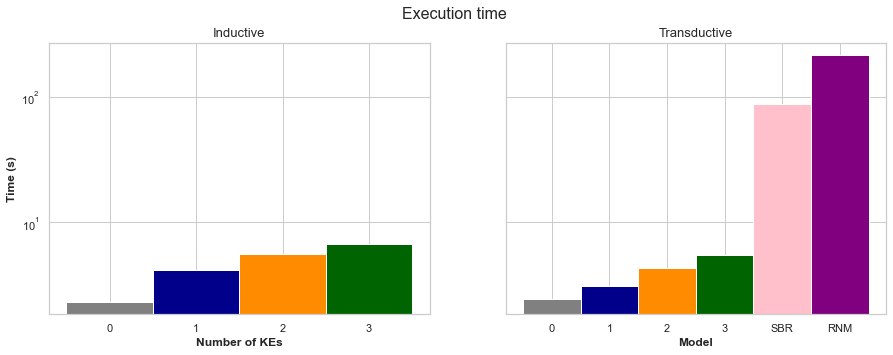

In [27]:
fig, axes = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15, 5))
fig.suptitle('Execution time', fontsize=16)
plot_time(history_inductive, axes[0], 'Number of KEs', 'Inductive', False)
axes[0].set_ylabel('Time (s)', fontweight='bold')
plot_time(history_transductive, axes[1], 'Model', 'Transductive', True)
axes[1].set_yscale('log')
# axes[0].legend(loc='upper left')
    
fig.savefig('plots/time_all.png')
fig.show()